## Marc Gosine

# Getting The Data

The data came from Collegescorecard, an Obama era project tasked with collecting a plethora of data on American colleges. I wanted to study the effect that certain college features had on its average SAT Score. What do colleges do to attract higher performing students? The data was obtained through collegescorecard's API which required an API key. The key was very easy to obtain since all that had to be done was to put your email address in the website. The next step was to find what variables best described what I wanted to analyze. The variables I collected were average SAT scores, school name, tuition revenue per student, average faculty salary (these last two variables I used to create my unique variable), school region and full time faculty rate. All of these variables were called upon using the fields arguments in the URL. 

When the data was called upon, it was in a JSON format. In order to use the data, I had to convert it to a pandas dataframe. I used the function 'pd.json_normalize' to convert it. While this did work, it only converted one page out of the 69 pages called upon. To put every page into one dataframe, I had to construct a for loop that called upon each page, convert each page to a dataframe, append the dataframes into a giant list, then stack it into one gigantic dataframe. I also exported the dataframe into my directory and saved it as a csv file to be used in R.

In [4]:
key = ('&api_key=your_key_here')
field = ('&fields=school.name,school.faculty_salary,school.tuition_revenue_per_fte,latest.admissions.sat_scores.average.overall,latest.student.demographics.race_ethnicity.white,school.ft_faculty_rate,school.region_id&')
#This is the api key and the variables called from the API

import pandas as pd
import requests

out = []

for i in range(69):
    get = requests.get('https://api.data.gov/ed/collegescorecard/v1/schools?'
       'per_page=100&page='+str(i)+field+key)
    #This for loop pulls the request of each of the 69 pages where each page has 100 records
    x = get.json()
    df = pd.json_normalize(x,'results')
    #each page is converted to a pandas dataframe
    out.append(df)
    #Each dataframe is appended onto this list
e = pd.concat(out, axis=0)
    #Converts the "out" list into one giant dataframe
e

,school.region_id,latest.admissions.sat_scores.average.overall,school.tuition_revenue_per_fte,school.name,school.ft_faculty_rate,school.faculty_salary,latest.student.demographics.race_ethnicity.white
0,3,1125,13477.0,Millikin University,0.7030,6133.0,0.6867
1,3,1114,12151.0,Monmouth College,0.7647,6789.0,0.6482
2,3,NaN,11456.0,Illinois College,0.7576,7085.0,0.7240
3,3,1079,8332.0,Quincy University,0.4141,5574.0,0.5655
4,3,NaN,1460.0,Olney Central College,0.4316,6556.0,0.9196
...,...,...,...,...,...,...,...
1,5,NaN,2534.0,Bevill State Community College,0.3234,6682.0,0.7869
2,8,NaN,7253.0,University of Alaska Anchorage,0.4840,9128.0,0.5375
3,5,NaN,1771.0,Central Alabama Community College,0.3966,6291.0,0.7250
4,5,1084,7582.0,Auburn University at Montgomery,0.9655,7678.0,0.4520


In [ ]:
e.to_csv('/Users/mdgos/Desktop/Directory/scorecard.csv', index = False)
#Exporting the file to be used in R

# Data Visualization
## Boxplots

Boxplots are a good way to visualize where the data lies in relation to your median and percentiles. The idea behind the first graph was to determine if there was much variation in faculty salaries by region. Instead of graphing each region, I chose 4 geographically distinct regions to find the greatest possible variance. While the US college system is mostly private, these schools are still funded by sudsidies from the government. The size of these subsidies could be determined by how much tax revenue is taken in or public priority. Wealthier regions may be able to invest more in faculty. The data shows that New England and the West Coast invest more in faculty on average than the Southeast and Rockies.  


The idea behind the second graph was to determine if there was much variation in SAT scores by region. Different regions tend to have different reputations in regards to the schools' reputations. For example, schools in the northeast tend to be known for their ivy leagues while schools in the South are known for athletics. As a result, concern for SAT scores could vary by region. This graph seems to tell a similar story as the first, the wealthier regions with better funded schools have better scores. However, the variation among the median is less apparant. New England and the rockies have a similar median. However, if you look at the higher quartiles, New England and the West Coast stretch beyond the other regions. 

C:\Users\mdgos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


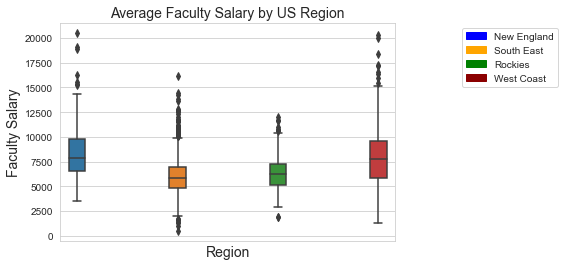

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
sns.set_style("whitegrid")
sns.color_palette("bright")
#Sets the style and color pallete of the graph. 

e_selectregions = e[(e['school.region_id'] == 1) | (e['school.region_id'] == 5)|
                     (e['school.region_id'] == 7) |(e['school.region_id'] == 8)]
#I wanted to make a boxplot that displays certain regions. This new dataframe was used for the boxplot

blue_patch = mpatches.Patch(color ='blue',label='New England')
orange_patch = mpatches.Patch(color ='orange',label='South East')
green_patch = mpatches.Patch(color='green', label='Rockies')
red_patch = mpatches.Patch(color='darkred', label='West Coast')
#Creating the legend for boxplot. I am assigning each region with respective name and color. Code from https://matplotlib.org/

ax = sns.boxplot('school.region_id','school.faculty_salary',data=e_selectregions,hue = 'school.region_id',width=0.8)
#Setting x and y axes of boxplots. Showing data by region
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right',handles=[blue_patch,orange_patch,green_patch,red_patch])
#Assembling legend using assignments above. Also setting locations of boxplot
plt.title("Average Faculty Salary by US Region", loc='center', fontsize=14, fontweight=3)
#Title of graph
plt.xlabel("Region", fontsize=14)
plt.ylabel("Faculty Salary", fontsize=14)
#Labelling axes
ax.set_xticks([])
#Prevents the id numbers from being shown
plt.savefig('salaryboxplt.png', dpi =300, format = 'png',bbox_inches='tight')
#Exporting graph as png

C:\Users\mdgos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


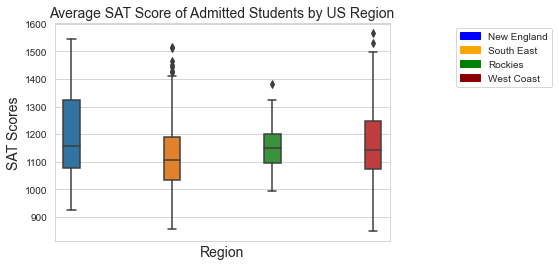

In [38]:
#Second boxplot. The code for the legend from the first graph is being reused. Style and pallette is also reused
ax = sns.boxplot('school.region_id','latest.admissions.sat_scores.average.overall',data=e_selectregions.dropna(),hue = 'school.region_id',width=0.8)
#Setting x and y axes of boxplots. Showing data by region
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right',handles=[blue_patch,orange_patch,green_patch,red_patch])
#Assembling legend using assignments above. Also setting locations of boxplot
plt.title("Average SAT Score of Admitted Students by US Region", loc='center', fontsize=14, fontweight=3)
#Title of graph
plt.xlabel("Region", fontsize=14)
plt.ylabel("SAT Scores", fontsize=14)
#Labelling axes
ax.set_xticks([])
#Prevents the id numbers from being shown
plt.savefig('SATboxplt.png', dpi =300, format = 'png',bbox_inches='tight')
#Exporting graph as png

## Scatterplots

When creating the new variable, I wanted to investigate the ratio of faculty investment in relation to how much money is made from students. Thus the salary to revenue ratio was created where the average monthly salary was the numerator and the tuition revenue per student was the denominator. The problem with putting this variable in a regression, however, is that it is difficult to interpret and visualize the change through graphs. Since this is a ratio, most of the numbers are between zero to one. Graphing this against SAT scores, the dependent variable, would be difficult due to the differences in magnitudes of the datasets. This is why I ultimately decided to log the variable. Once the variable is logged, it is easier to see the percent change in a scatterplot.

C:\Users\mdgos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


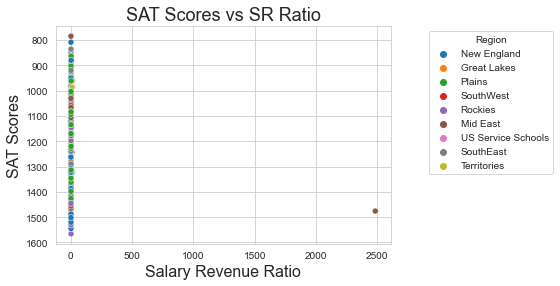

In [24]:
salary_to_rev= e['school.faculty_salary'] / e['school.tuition_revenue_per_fte']
final= pd.DataFrame(salary_to_rev).rename(columns={0:'salary to rev'})
e1 = pd.concat([e,final], axis=1, sort=False)
#Creating unique variable salary to revenue. Computed by dividing the faculty salary by tution revenue.
#Merging new column with existing dataset

e1['logged salary to rev'] = np.log(e1['salary to rev'])
#Computing the log of the new variable

e2 =  e1['school.region_id'].replace([0],'US Service Schools').replace([1],'New England').replace([2],'Mid East').replace([3],'New England').replace([4],'Great Lakes').replace([5],'Plains').replace([6],'SouthEast').replace([7],'SouthWest').replace([8],'Rockies').replace([9],'Territories')
#Creating a column that lists regions by actual names rather than numbers
e2 = pd.DataFrame(e2)
e2 = e2.rename(columns={'school.region_id': 'school.region_id_2'})
#Creating a separate column for the id numbers and names
alt_alt = pd.concat([e1,e2], axis=1, sort=False)
#Merging all the dataframes together

sns.scatterplot('salary to rev', 'latest.admissions.sat_scores.average.overall',data=alt_alt,hue = 'school.region_id_2')
#Setting x and y axes of scatterplot. Graphing by region
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1),title = 'Region')
#Sets location of legend. Will takes names from column with name rather than number
plt.title("SAT Scores vs SR Ratio", loc='center', fontsize=18, fontweight=0)
#Title of graph
plt.xlabel('Salary Revenue Ratio', fontsize=16)
plt.ylabel('SAT Scores', fontsize=16)
#labelling axes
plt.savefig('SATscatterplot.png', dpi =300, format = 'png',bbox_inches='tight')
#Exporting graph as png

C:\Users\mdgos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


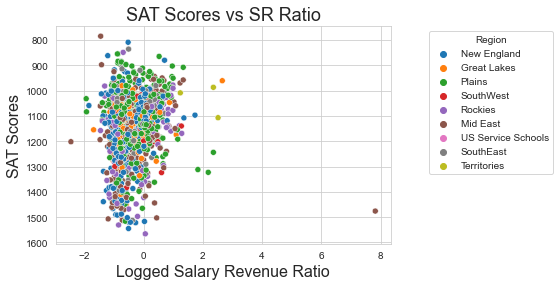

In [25]:
sns.scatterplot('logged salary to rev', 'latest.admissions.sat_scores.average.overall',data=alt_alt, hue = 'school.region_id_2')
#Setting x and y axes of scatterplot. Graphing by region
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1),title = 'Region')
#Sets location of legend. Will takes names from column with name rather than number
plt.title("SAT Scores vs SR Ratio", loc='center', fontsize=18, fontweight=0)
#Title of graph
plt.xlabel('Logged Salary Revenue Ratio', fontsize=16)
plt.ylabel('SAT Scores', fontsize=16)
#labelling axes
plt.savefig('SATscatterplotlogged.png', dpi =300, format = 'png',bbox_inches='tight')
#Exporting graph as png